In [20]:
# spot check on engineered-features
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

import pandas as pd
import numpy as np
import calendar
from sklearn.cluster import MiniBatchKMeans
from sklearn import preprocessing
from tpot import TPOTRegressor

# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
from matplotlib import pyplot
from graphviz import Digraph

In [6]:
def clean_data(df):
    df_ = df.copy()
    # remove the 2016-01-23 data since its too less comapre others days,
    # maybe quality is not good
    # df_ = df_[(df_.pickup_date != '2016-01-23') & (df_.dropoff_date != '2016-01-23')]
    # potential passenger_count outlier
    df_ = df_[(df_['passenger_count'] <= 6) & (df_['passenger_count'] > 0)]
    return df_

### ================================================ ###


def load_data():
    df_train = pd.read_csv('../data/train.csv')
    df_test = pd.read_csv('../data/test.csv')
    # sample train data for fast job
    # df_train = df_train.sample(n=100)
    # clean train data
    df_train_ = clean_data(df_train)
    df_test = clean_data(df_test)
    # merge train and test data for fast process and let model view test data when training as well
    df_all = pd.concat([df_train_, df_test], axis=0)
    return df_all, df_train_, df_test

df_all_, df_train, df_test = load_data()

# modeling
features = ['VendorID',
            'RatecodeID',
            'PULocationID',
            'DOLocationID',
            'passenger_count',
            'trip_distance',
            'fare_amount',
            'extra',
            'mta_tax',
            'tolls_amount',
            'improvement_surcharge',
            'total_amount',
            'payment_type',
            'trip_type',
            'duration',
            'day_of_week',
            'weekend',
            'speed',
            'tip_amount']

X_train = df_all_[features].values
y_train = X_train[:, X_train.shape[1]-1]

X_test = df_test[features].values
y_test = X_test[:, X_train.shape[1]-1]

y_train = np.ravel(y_train)
print (df_all_[features].head())

   VendorID  RatecodeID  PULocationID  DOLocationID  passenger_count  \
0         2           1            40           141              1.0   
1         2           1            74            74              1.0   
2         2           1            65           143              2.0   
3         2           1           165            40              1.0   
4         2           1            94           120              1.0   

   trip_distance  fare_amount  extra  mta_tax  tolls_amount  \
0           2.91         13.0    0.0      0.5           0.0   
1           0.36          3.5    0.0      0.5           0.0   
2           2.31         12.5    0.0      0.5           0.0   
3           0.96          6.5    1.0      0.5           0.0   
4           2.86         15.0    0.0      0.5           0.0   

   improvement_surcharge  total_amount  payment_type  trip_type  duration  \
0                    0.3         16.56             1        1.0    1194.0   
1                    0.3          

[0.01893888 0.         0.0582665  0.08329935 0.003013   0.08928005
 0.0419102  0.0076118  0.         0.         0.         0.15490916
 0.         0.         0.1134747  0.0239681  0.         0.09911196
 0.3062163 ]


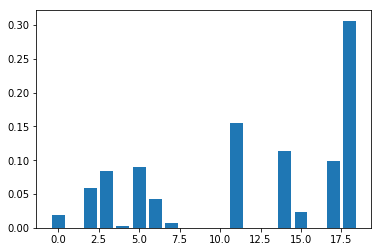

In [7]:
X = X_train[:5000]
y = y_train[:5000]

# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()


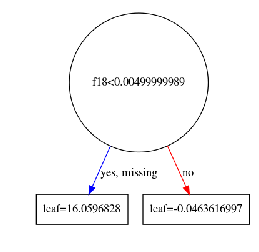

In [21]:
# plot single tree
plot_tree(model)
pyplot.show()

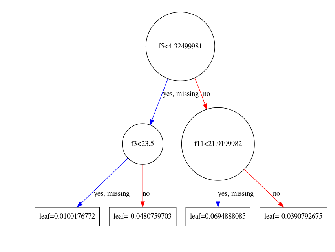

In [22]:
# plot more branch tree
plot_tree(model, num_trees=4)
pyplot.show()

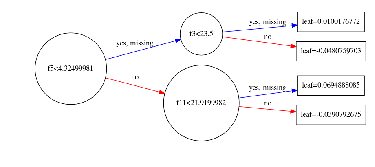

In [24]:
plot_tree(model, num_trees=4, rankdir='LR')